In [3]:
import os
os.getcwd()
os.chdir('/home/billo/Documents/python-letsupgrade-8days/asignments-AI-ML')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('mtcars.csv')


In [6]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# Detecting outlier using Z score

# Using Z score
# Formula for Z score = (Observation — Mean)/Standard Deviation

# z = (X — μ) / σ

In [13]:
df.sample(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.00,1,0,4,2
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.60,1,1,4,2
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
0,Mazda RX4,21.0,6,160.0,110,3.90,2.62,16.46,0,1,4,4
5,Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1


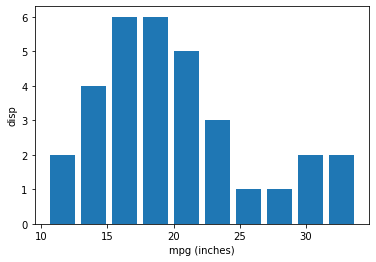

In [16]:
plt.hist(df.mpg,bins=10, rwidth=0.8)
plt.xlabel('mpg (inches)')
plt.ylabel('disp')
plt.show()

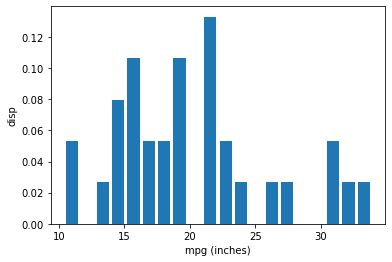

In [25]:
from scipy.stats import norm
import numpy as np
plt.hist(df.mpg, bins=20, rwidth=0.8, density=True)
plt.xlabel('mpg (inches)')
plt.ylabel('disp')
plt.show()

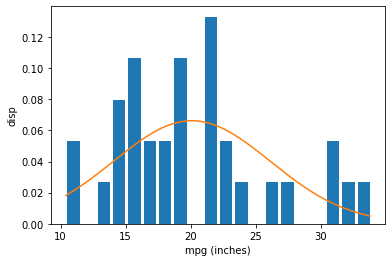

In [29]:
from scipy.stats import norm
import numpy as np
plt.hist(df.mpg, bins=20, rwidth=0.8, density=True)
plt.xlabel('mpg (inches)')
plt.ylabel('disp')
rng = np.arange(df.mpg.min(), df.mpg.max(), 0.1)
plt.plot(rng,norm.pdf(rng,df.mpg.mean(),df.mpg.std()))
plt.show()

In [30]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [32]:
df.drat.mean()

3.5965625000000006

In [33]:
df.drat.std()

0.5346787360709716

# Outlier detection

In [36]:
upper_limit = df.mpg.mean() + 3*df.mpg.std()
upper_limit

38.17146915626731

In [39]:
lower_limit = df.mpg.max() - 3*df.mpg.std()
lower_limit

15.819155843732684

In [41]:
df_no_outlier_std_dev = df[(df.mpg>upper_limit) | (df.mpg<lower_limit)]

In [42]:
df_no_outlier_std_dev.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [43]:
df_no_outlier_std_dev.shape

(10, 12)

In [46]:
df['zscore'] = (df.mpg - df.mpg.mean() ) / df.mpg.std()

In [47]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.150885
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.150885
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.449543
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.217253
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.230735


In [48]:
df.shape

(32, 13)

In [50]:
df[df['zscore']>3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore


In [52]:
df[df['zscore']<3]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.150885
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.150885
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.449543
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.217253
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.230735
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,-0.330287
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,-0.960789
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0.715018
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0.449543
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,-0.147774


In [53]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,zscore
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.150885
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.150885
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.449543
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.217253
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.230735


# boston dataset

In [11]:
from sklearn.datasets import load_boston
import pandas as pd


In [12]:
boston = load_boston()
boston.data.shape

(506, 13)

In [13]:
type(boston)

sklearn.utils.Bunch

In [14]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
pd.DataFrame(boston.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
pd.DataFrame(boston.target).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [18]:
pd.DataFrame(boston.feature_names).head()

,0
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX


In [23]:
import os
os.getcwd()

'/home/billo/Documents/python-letsupgrade-8days/asignments-AI-ML'